In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
# 1. Baza danych Iris - proszę podzielić na zbiór uczący i testowy
iris = datasets.load_iris()
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)

In [3]:
a = (1, 2, 3)
b = (4, 5, 6)
dist = distance.euclidean(a, b)
dist

5.196152422706632

In [4]:
# 2. Wybieramy wartość k
k=5

In [5]:
# 3. Poszukujemy k obserwacji, które są najbliższe do naszego analizowanego przykładu.
# Do wyznaczania odległości skorzystaj z algorytmu Eukleidesa.

def kNN(NewPoint, CurrentPoints, PointsLabels, k):
    dist = pd.DataFrame(columns=['Distance', 'Label'])
    for Point, label in zip(CurrentPoints, PointsLabels):
        dist = dist.append({'Distance':distance.euclidean(NewPoint, Point), 'Label':label}, ignore_index=True)
    dist.sort_values(by=['Distance'], inplace=True)
    # 4. Użyj najczęściej pojawiającej się wartości z “k najbliższych sąsiadów” jako wartość dla nieznanego Iris.
    cnt = dist.iloc[:k]['Label'].value_counts()
    if len(cnt) > 1:
        ki = 1
        while cnt.index[0] == cnt.index[1]:
            cnt = dist.iloc[:k+ki]['Label'].value_counts()
            ki += 1
    return cnt.index[0]

test = kNN(features_test[0], features_train, labels_train, k)
test

1.0

In [6]:
predictions = list()
for data in features_test:
    predictions.append(kNN(data, features_train, labels_train, k))

In [7]:
# Sprawdzanie skuteczności klasyfikatora
output = accuracy_score(labels_test, predictions)
print(output)

0.9466666666666667


## kNN - Python (sklearn)

In [8]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# 1. Podziel zbiór na uczący (70 %) i treningowy (30 %).
iris = datasets.load_iris()
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [10]:
# 2. Stworzenie klasyfikatora i jego wyuczenie.
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(features_train, labels_train)
# 3. Predykcja wartości.
predictions = neigh.predict(features_test)
# 4. Wyznaczenie miary skuteczności dla zbioru testowego (ang. accuracy).
output = accuracy_score(labels_test, predictions)
print(output)

0.9555555555555556


## Decision trees

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [12]:
clf.predict(iris.data[:1, :])

array([0])

In [13]:
clf.predict_proba(iris.data[:1, :])

array([[1., 0., 0.]])

In [14]:
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png("iris.png")

In [15]:
import matplotlib.pyplot as plt
schema_im = plt.imread('iris.png')
plt.figure(figsize=(18,8))
plt.imshow(schema_im)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

# wczytywanie danych
dane = loadmat('mnist.mat')
dane

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [17]:
#Zad 1. Podziel dane na parametry X oraz odpowiedź y:
X = dane['X']
y = dane['y']
# Standaryzacja
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
# Zamiana cyfry 10 -> 0 (błąd w zbiorze danych)
y[np.where(y==10)]=0
# wysokość i szerokość obrazka z cyfrą
h = 20
w = 20

In [18]:
# Zad 2. Proszę wyświetlić liczbę cyfr oraz liczbę pikseli przypadającą na jeden obraz
print(f'Amount of numbers: {y.size}')
print(f'Amount of pixels for one image: {X[0,:].size}')

Amount of numbers: 5000
Amount of pixels for one image: 400


In [19]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

C:\Users\milan\.conda\envs\ML_lab\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


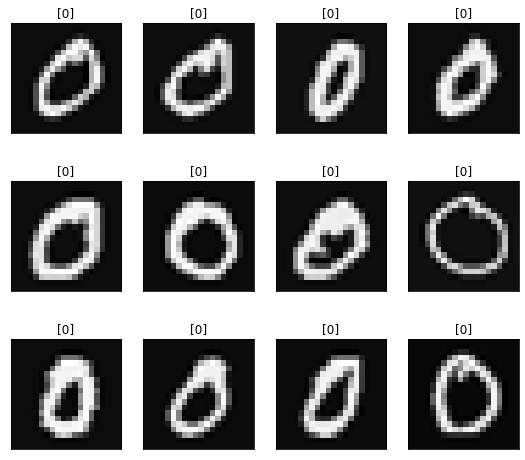

In [20]:
# Zad 3. Proszę wyświetlić przykładowe cyfry ze zbioru danych (funkcja plot_mnist).
plot_mnist(X, y, h, w)

C:\Users\milan\.conda\envs\ML_lab\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


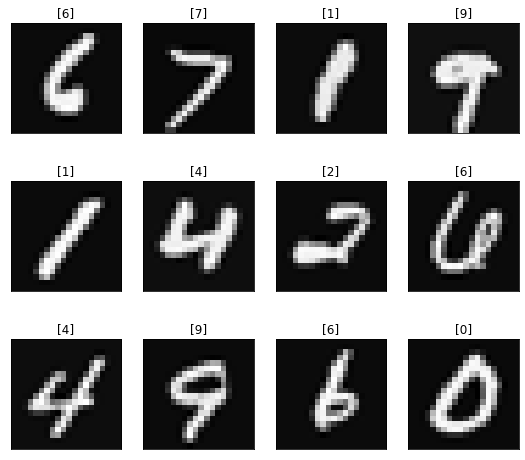

In [21]:
n_col = 4
n_row = 3

import random
Rands = random.sample(range(1, y.size), n_col*n_row)

i=0
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
for R in Rands:
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(X[R,:].reshape((h, w)).T, cmap=plt.cm.gray)
    plt.title(y[R], size=12)
    plt.xticks(())
    plt.yticks(())
    i += 1

In [22]:
# Zad 4. Proszę podzielić zbiór danych na uczący (70 %) i treningowy.
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Zad 5. Proszę stworzyć instancję klasyfikatora, następnie uczenie oraz predykcja dla danych testowych.
DEPTH = 10

clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(features_train, labels_train)

predictions = clf.predict(features_test)
accuracy_score(labels_test, predictions)

0.8086666666666666

In [24]:
# Zad 6. Proszę przedstawić wynik F1, macierz błędów (confusion matrix) oraz raport klasyfikacji.
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       166
           1       0.86      0.92      0.89       153
           2       0.73      0.72      0.72       132
           3       0.74      0.76      0.75       144
           4       0.86      0.84      0.85       158
           5       0.70      0.74      0.72       133
           6       0.90      0.84      0.87       158
           7       0.83      0.80      0.82       138
           8       0.74      0.74      0.74       154
           9       0.80      0.75      0.78       164

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.80      1500
weighted avg       0.81      0.81      0.81      1500



In [25]:
confusion_matrix(labels_test, predictions)

array([[156,   0,   2,   2,   0,   1,   0,   1,   3,   1],
       [  0, 141,   2,   5,   1,   1,   0,   1,   2,   0],
       [  1,   2,  95,   5,   7,   5,   4,   3,   7,   3],
       [  1,   6,   7, 109,   0,   7,   0,   4,   6,   4],
       [  0,   1,   2,   2, 133,   7,   0,   2,   3,   8],
       [  3,   1,   4,   8,   2,  99,   6,   2,   5,   3],
       [  5,   3,   6,   2,   1,   5, 132,   0,   3,   1],
       [  3,   3,   4,   6,   2,   2,   2, 111,   2,   3],
       [  2,   3,   7,   5,   4,   9,   2,   1, 114,   7],
       [  2,   4,   2,   4,   5,   6,   0,   9,   9, 123]], dtype=int64)

In [26]:
f1_score(labels_test, predictions, average=None)

array([0.92035398, 0.88958991, 0.72243346, 0.74657534, 0.84984026,
       0.72      , 0.86842105, 0.81617647, 0.74025974, 0.77602524])